##### Mathjax custom macros #####

$ \newcommand{\opexpect}[3]{\langle #1 \vert #2 \vert #3 \rangle} $

$ \newcommand{\rarrow}{\rightarrow} $
$ \newcommand{\bra}{\langle} $
$ \newcommand{\ket}{\rangle} $

$ \newcommand{\mb}[1]{\mathbf{#1}} $
$ \newcommand{\mc}[1]{\mathcal{#1}} $
$ \newcommand{\mbb}[1]{\mathbb{#1}} $
$ \newcommand{\mf}[1]{\mathfrak{#1}} $

$ \newcommand{\vect}[1]{\boldsymbol{\mathrm{#1}}} $
$ \newcommand{\expect}[1]{\langle #1\rangle} $

$ \newcommand{\innerp}[2]{\langle #1 \vert #2 \rangle} $
$ \newcommand{\fullbra}[1]{\langle #1 \vert} $
$ \newcommand{\fullket}[1]{\vert #1 \rangle} $
$ \newcommand{\supersc}[1]{$^{\text{#1}}$} $
$ \newcommand{\subsc}[1]{$_{\text{#1}}$} $
$ \newcommand{\sltwoc}{SL(2,\mathbb{C})} $
$ \newcommand{\sltwoz}{SL(2,\mathbb{Z})} $

$ \newcommand{\utilde}[1]{\underset{\sim}{#1}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline

#### Hubbard Model

##### Hamiltonian:

$$ H_{h} = -t \sum_{<i,j>\sigma} c^\dagger_{i\sigma} c_{j\sigma} + U \sum_i n_{i\uparrow}n_{j\downarrow} - \mu \sum_i (n_{i\uparrow} + n_{i\downarrow}) $$

where the first term is the kinetic energy. The sum is over both possible spin at each lattice site $ \sigma \in \{\uparrow,\downarrow\}$. Second term is the potential energy due to repulsion of electrons at a site containing two electrons. The last term is the chemical potential associated with adding particles to the system.

The partition function for a system in a thermal state is given by:

$$ Z = \text{Tr} \left[ e^{-\beta H} \right] = \sum_\alpha \langle \alpha \vert e^{-\beta H} \vert \alpha \rangle  $$

For $ H_{h} $ on a single site, the partition function becomes:

$$ Z_{h} = 1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)} $$

If we redefine the chemical potential $ \mu \rightarrow \mu + U/2$, then the Hubbard hamiltonian becomes:

$$ H = -t \sum_{<i,j>\sigma} c^\dagger_{i\sigma} c_{j\sigma} + U \sum_i \left(n_{i\uparrow} - \frac{1}{2}\right) \left(n_{j\downarrow} - \frac{1}{2}\right) - \mu \sum_i (n_{i\uparrow} + n_{i\downarrow}) $$

### Operators and States in QuTiP

Rather than using the analytical expression for the partition function, energy and other properties of the one-site Hubbard model, we will now use the Python package [QuTiP](http://qutip.org/) to define the Hubbard model Hamiltonian on $N$ sites. For this we will need to define creation, annihilation and number operators.

For a single site system a creation operator is simply defined using the `create()` function:

$$\text{create(2)} \Rightarrow c^\dagger$$

which returns the matrix:

\begin{equation*}\left(\begin{array}{*{11}c}0.0 & 0.0\\1.0 & 0.0\\\end{array}\right)\end{equation*}

In [2]:
create(2)

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = False
Qobj data =
[[ 0.  0.]
 [ 1.  0.]]

When we have more than one site, the operator must be defined as an operator acting of the *full* Hilbert space of the system:
$$ \mc{H} = \otimes_{i=1}^N \mc{H}_i $$
where $\mc{H}_i$ is the Hilbert space corresponding to a single site. Thus the creation operator for the $j^\text{th}$ site is given by:
$$ \mb{1}_1 \otimes \ldots \mb{1}_{j-1} \otimes c^\dagger_j \otimes \mb{1}_{j+1} \ldots \mb{1}_N $$
where $\mb{1}_i$ is the identity operator acting on the $i^\text{th}$ site.

The code for this is as follows:

In [3]:
def createN(i = 1, N = 1, dims = 2):
    '''Returns the creation operator for the i^th site of an N site spin-chain with a 
    Hilbert space of dimensionality dims at each site'''
    
    cdag = create(dims)
    c = destroy(dims)
    cid = identity(dims)
    
    id_list = []
    c_list = []
    
    [c_list.append(cid) for n in range(N)]
    
#    print len(c_list)
    
    c_list[i-1] = cdag
    
    return tensor(c_list)
    

In [4]:
createN(i = 1, N = 1, dims = 3)

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.        ]
 [ 1.          0.          0.        ]
 [ 0.          1.41421356  0.        ]]

In [5]:
def destroyN(i = 1, N = 1, dims = 2):
    '''Returns the destruction operator for the i^th site of an N site spin-chain with a 
    Hilbert space of dimensionality dims at each site'''
    
    c = destroy(dims)
    cid = identity(dims)
    
    id_list = []
    c_list = []
    
    [c_list.append(cid) for n in range(N)]
    
#    print len(c_list)
    
    c_list[i-1] = c
    
    return tensor(c_list)


In [6]:
destroyN(i = 1, N = 2)

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = False
Qobj data =
[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

In [7]:
def numberN(i = 1, N = 1, dims = 2):
    '''Returns the number operator for the i^th site of an N site spin-chain with a 
    Hilbert space of dimensionality dims at each site'''
    
    cdag = create(dims)
    c = destroy(dims)
    numop = cdag * c
    cid = identity(dims)
    
    id_list = []
    op_list = []
    
    [op_list.append(cid) for n in range(N)]
    
#    print len(op_list)
    
    op_list[i-1] = numop
    
    return tensor(op_list)


In [8]:
numberN(i = 2, N = 2)

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]]

Now at each site, one can have two electrons with spin up and down respectively. Thus our creation/annihilation operators also have a spin index $\sigma$:
$$ \mb{1}_1 \otimes \ldots \mb{1}_{j-1} \otimes c^\dagger_{j\sigma} \otimes \mb{1}_{j+1} \ldots \mb{1}_N $$
In order to implement we need two sets of creation/annihilation operators. One set for up-spin and one set for down-spin.

In [9]:
def hubbardHamiltonian(N = 10, t = 1, U = 1, mu = 0, shift = False, dims = 2):
    '''Returns operator corresponding to Hubbard Hamiltonian on N sites.
    Default value of N is 10. t, U and mu are the kinetic energy, potential energy and
    chemical potential respectively.
    If shift is False then first version of Hamiltonian is returned, else the second
    version (where the chemical potential is shifted $\mu \rightarrow \mu - U/2$) is
    returned.
    dims is the dimension of the Hilbert space for each electron. Default is 2'''
    
    # two sets of creation/destruction operators, labeled A and B.
    
    destroyA_list = []
    createA_list = []

    destroyB_list = []
    createB_list = []

    nA_list = []
    nB_list = []
    
    idOp = identity(dims)

    idOp_list = []

    [idOp_list.append(idOp) for i in range(N)]
    
    superid = tensor(idOp_list) # identity operator for whole system
    
    H = 0

    for i in range(N):
        # Create list containing identity operator for each site
        
        createA_list.append(createN(i,N,dims))
        createB_list.append(createN(i,N,dims))

        destroyA_list.append(destroyN(i,N,dims))
        destroyB_list.append(destroyN(i,N,dims))

        nA_list.append(numberN(i,N,dims))
        nB_list.append(numberN(i,N,dims))
        
    for i in range(N):
        H += - t * (createA_list[i] * destroyA_list[i] + createB_list[i] * destroyB_list[i]) \
            - mu * (nA_list[i] + nB_list[i])
        if shift == True:
            H += U * (nA_list[i] - 0.5 * superid) * (nB_list[i] - 0.5 * superid)
        else:
            H += U * nA_list[i] * nB_list[i]
    
    return H

In [112]:
import sympy as sp
import sympy.physics as sypy
import sympy.physics.quantum as spq
import sympy.physics.qho_1d as qho
import sympy.physics.quantum.sho1d as sho
import sympy.physics.quantum.shor as shor

In [115]:
ham = sho.Hamiltonian('H')

In [116]:
ham.

In [117]:
spq.Operator.

In [118]:
classmethod?

In [119]:
cls?

Object `cls` not found.


In [123]:
d = {"voltage": "four million", "state": "bleedin' demised", "action": "VOOM"}
e = [2,3]

In [11]:
h1 = hubbardHamiltonian(mu=0.1,N=6,t=-1)
h1

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = [64, 64], type = oper, isherm = True
Qobj data =
[[  0.    0.    0.  ...,   0.    0.    0. ]
 [  0.    2.8   0.  ...,   0.    0.    0. ]
 [  0.    0.    2.8 ...,   0.    0.    0. ]
 ..., 
 [  0.    0.    0.  ...,  14.    0.    0. ]
 [  0.    0.    0.  ...,   0.   14.    0. ]
 [  0.    0.    0.  ...,   0.    0.   16.8]]

In [12]:
h1.eigenenergies()

array([  0. ,   2.8,   2.8,   2.8,   2.8,   2.8,   2.8,   5.6,   5.6,
         5.6,   5.6,   5.6,   5.6,   5.6,   5.6,   5.6,   5.6,   5.6,
         5.6,   5.6,   5.6,   5.6,   8.4,   8.4,   8.4,   8.4,   8.4,
         8.4,   8.4,   8.4,   8.4,   8.4,   8.4,   8.4,   8.4,   8.4,
         8.4,   8.4,   8.4,   8.4,   8.4,   8.4,  11.2,  11.2,  11.2,
        11.2,  11.2,  11.2,  11.2,  11.2,  11.2,  11.2,  11.2,  11.2,
        11.2,  11.2,  11.2,  14. ,  14. ,  14. ,  14. ,  14. ,  14. ,  16.8])

In [40]:
ground = h1.eigenstates()

In [41]:
np.shape(ground)

(2, 64)

In [56]:
Qobj.expm?

In [75]:
(2j*np.pi*sigmaz()).expm()

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0.  1.]]

In [100]:
exph1 = (-0.95*h1).expm()

In [101]:
exph1.tr()

1.5002946744691417

In [102]:
(h1*exph1).tr()

1.6477820449445226

In [103]:
(exph1 * h1).tr()/exph1.tr()

1.0983056015496204

In [34]:
expect?

In [49]:
expect(h1,ground[1][10])

5.6

In [50]:
entropy_vn(h1)

-1194.5064227355053

In [ ]:
energy_op = h1 + 0.1 * 

In [52]:
entropy??

In [ ]:
hinton?

In [16]:
basis(4,0)

Quantum object: dims = [[4], [1]], shape = [4, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [2]:
def partition_hubbard(temp = 1., t = 0., U = 1., mu = 0.,kB = 1.):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.0*beta*(mu+t-U/2.0))
    return 1 + 2*exp1 + exp2

In [3]:
partition_hubbard(mu=np.arange(0.1,2,0.5))

array([  3.6596708 ,   5.86564036,  10.32844897,  19.93107835])

In [ ]:
temp_values = np.arange(0.1,5,0.1)
plot_num = 1
for mu in np.arange(0,0.6,0.1):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(2,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1
 

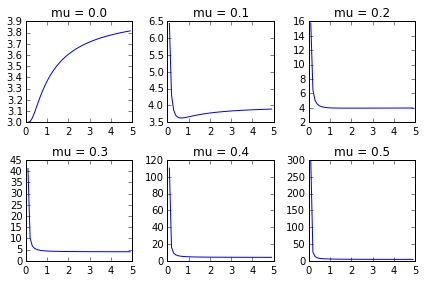

In [4]:
# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

In [ ]:
plot_num = 1
for mu in np.arange(-0.5,0.5,0.25):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(2,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1

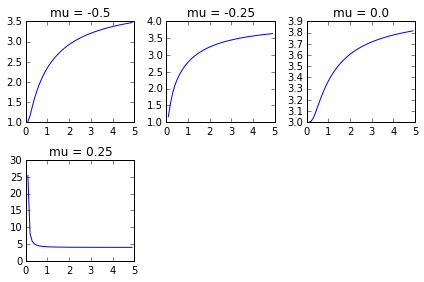

In [5]:
# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

In [ ]:
plot_num = 1
for mu in np.arange(0,0.09,0.01):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.subplot(3,3,plot_num)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)
    plot_num+=1

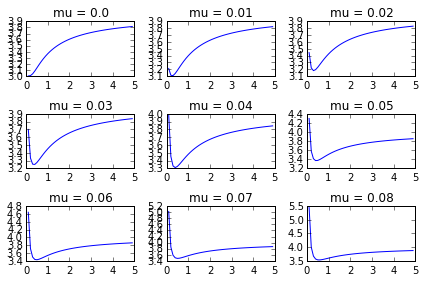

In [6]:
# plt.tight_layout() ensures that neighboring subplots do not overlap
plt.tight_layout()
plt.show()

The energy for the single site Hubbard model is:

\begin{align}
    E & = \langle H + \mu n \rangle = \text{Tr} \left[ (H + \mu n) e^{-\beta H} \right] \\
      & = \frac{1}{Z} \sum_\alpha \langle \alpha \vert (H + \mu n) e^{-\beta H} \vert \alpha \rangle \\ 
      & = \frac{U e^{2\beta(t+\mu - U/2)}}{1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)}}
\end{align}

and the occupation number is:

\begin{align}
    \rho & = \langle n \rangle = \text{Tr} \left[ n e^{-\beta H} \right] \\
         & = \frac{2 e^{\beta(\mu + t)} + 2 e^{2\beta(t+\mu-U/2)}}{1 + e^{\beta(\mu + t)} + e^{\beta(2t + 2\mu - U)}}
\end{align}

In [7]:
def plot_hubbard(mu):
    z_values = partition_hubbard(temp=temp_values,mu=mu)
    plt.title('mu = '+ str(mu))
    plt.plot(temp_values,z_values)

In [8]:
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [10]:
def energy_hubbard(temp = 1, t = 0, U = 1, mu = 0,kB = 1):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.*beta*(mu+t-U/2.))
    return (-2*t*exp1 + (U - 2*t) * exp2)/(1 + 2*exp1 + exp2 )

In [11]:
def filling_hubbard(temp = 1, t = 0, U = 1, mu = 0,kB = 1):
    ''' Partition function for single site Hubbard model.
        t is the kinetic energy
        U is the potential energy
        mu is the chemical potential
        temp is the temperature
        kB is Boltzmann's constant, set to 1 by default
    '''
#    temp = temp + 10**(-5)
    beta = 1/(temp*kB)
    exp1 = np.exp(beta*(mu+t))
    exp2 = np.exp(2.*beta*(mu+t-U/2.))
    return (2*exp1 + 2*exp2)/(1 + 2*exp1 + exp2 )

In [12]:
mu_values = np.arange(0,10,0.1)

In [14]:
import matplotlib as mpl

mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')

In [15]:
def plot_filling(temperature):
    f_values = filling_hubbard(temp=temperature,mu=mu_values,t=0,U=4.0)
    plt.title('U = 4.0')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\langle n \rangle $')
    plt.plot(mu_values,f_values,label='T = '+str(temperature))
    plt.legend(loc='lower right', shadow=True)

In [16]:
def plot_energy_mu(temperature):
    e_values = energy_hubbard(temp=temperature,mu=mu_values)
    plt.title('U = 4.0')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$\langle E \rangle $')
    plt.legend()
    plt.plot(mu_values,e_values,label='T = '+str(temperature))
    plt.legend(loc='upper center', shadow=True)